#  Features :

GUI interface for BMI input

Category display (Underweight, Normal, etc.)

History stored in memory

BMI trend graph with matplotlib

In [8]:
import tkinter as tk
from tkinter import messagebox
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# BMI Calculation Logic

In [11]:
bmi_data = []

def calculate_bmi():
    try:
        weight = float(entry_weight.get())
        height = float(entry_height.get())
        if height <= 0 or weight <= 0:
            raise ValueError("Height and weight must be positive.")
        bmi = round(weight / (height ** 2), 2)

        if bmi < 18.5:
            category = "Underweight"
        elif bmi < 25:
            category = "Normal"
        elif bmi < 30:
            category = "Overweight"
        else:
            category = "Obese"

        result_label.config(text=f"BMI: {bmi} ({category})")
        bmi_data.append({
            "Weight (kg)": weight,
            "Height (m)": height,
            "BMI": bmi,
            "Category": category
        })

    except ValueError:
        messagebox.showerror("Invalid input", "Please enter valid numbers for weight and height.")


# Show BMI Trend Graph

In [12]:
def show_graph():
    if bmi_data:
        df = pd.DataFrame(bmi_data)
        df["BMI"].plot(kind="line", title="BMI Trend", marker='o')
        plt.xlabel("Entry Number")
        plt.ylabel("BMI")
        plt.grid(True)
        plt.show()
    else:
        messagebox.showinfo("No Data", "No BMI data to plot.")


# Build the GUI using Tkinter

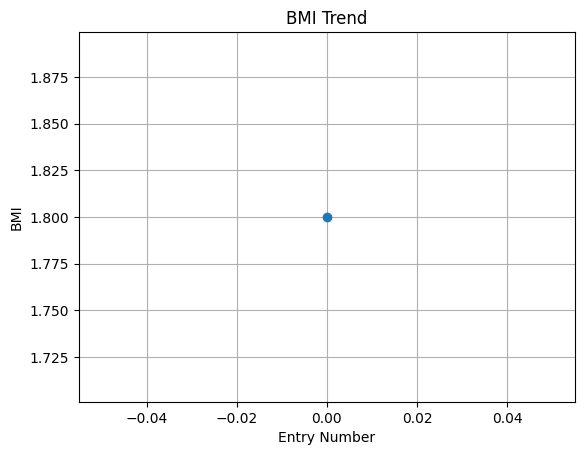

In [ ]:
app = tk.Tk()
app.title("BMI Calculator")
app.geometry("300x300")

tk.Label(app, text="Weight (kg):").pack()
entry_weight = tk.Entry(app)
entry_weight.pack()

tk.Label(app, text="Height (m):").pack()
entry_height = tk.Entry(app)
entry_height.pack()

tk.Button(app, text="Calculate BMI", command=calculate_bmi).pack(pady=5)

result_label = tk.Label(app, text="")
result_label.pack()

tk.Button(app, text="Show Graph", command=show_graph).pack(pady=5)

app.mainloop()
